In [47]:
from scipy.stats import beta
from matplotlib import pyplot as plt
import numpy as np

dP/dt = alpha * P ( 1 - P / beta)

In [48]:
def logistic_growth(t, n_0, alpha=1, beta=10):
    numerator = (1/beta) * n_0 * np.exp(alpha* t)
    denominator = (1/beta) + n_0 * (np.exp(alpha* t - 1))
    return numerator / denominator

In [74]:
def generate_log_growth_sample(t, n_0):
    noise = 0.001 * np.random.normal(0, 1)
    return logistic_growth(t, n_0) + noise

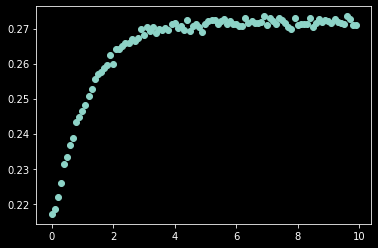

In [144]:
x = []
n_0 = 1
time = np.arange(0, 10, 0.1)
for t in time: 
    x.append(generate_log_growth_sample(t, n_0))

x = np.asarray(x)

plt.scatter(time, x)

In [145]:
def likelihood(samples, proposed_solution, var=0.1):
    # print('Samples - proposed_sol:', samples-proposed_solution)
    # print('Exp of error: ', np.exp( - np.power(samples - proposed_solution, 2) / (2 * var**2)))
    p = (1/np.sqrt(2* np.pi * var**2)) * np.exp(-np.power(samples - proposed_solution, 2) / (2 * var**2))
    # print('P vector in likelihood: ', p)
    # print('Product of p: ', np.prod(p))
    return np.prod(p)
    

In [146]:
def prior(alpha=1, beta=1): 
    return 1.

In [147]:
def proposed_solution(time_vec, alpha, beta, n_0=1):
    return logistic_growth(time_vec, n_0, alpha=alpha, beta=beta)


## 1.1 
In a single sample you find that there are 6 ticks that test positive
for Borrelia. Assuming a Beta(1,1) prior analytically calculate the posterior
distribution. (Hint: by analytically here I mean look up the result on Google/in
the lecture notes.) Graph this distribution.

In [148]:
N = 100
X = 4

def posterior(time, samples, alpha, beta):
    def_solution = proposed_solution(time, alpha, beta)
    l = likelihood(samples, def_solution)
    # print('Likelihood: ', l)
    p = prior()
    return l * p

# theta = np.arange(0, 1, 0.001)
# fig = plt.plot(theta, posterior(theta, X, N))


In [149]:
def proposal_parameters(current_params, var=0.25):
    alpha = current_params[0]
    beta = current_params[1]
    new_alpha = np.random.normal(alpha, var)
    new_beta = np.random.normal(beta, var)
    return (new_alpha, new_beta)     

## 1.6 
Create the “accept/reject” function of Random Walk Metropolis
that accepts as input θcurrent and θproposed and outputs the next value of θ. This
is done based on a ratio:


r = p(X|θproposed) ×p(θproposed) / p(X|θcurrent) ×p(θcurrent)


and a uniformly-distributed random number between 0 and 1, which we call a.
If r > a then we update our current value of θcurrent →θproposed; alternatively
we remain at θcurrent.

In [150]:
def accept_reject_RWM(time, samples, current_params, proposed_params):
    current_alpha = current_params[0]
    current_beta = current_params[1]

    proposed_alpha = proposed_params[0]
    proposed_beta = proposed_params[1]
    ratio = posterior(time, samples, proposed_alpha, proposed_beta) / posterior(time, samples, current_alpha, current_beta)
    if ratio > np.random.uniform():
        return (proposed_alpha, proposed_beta)
    else: 
        return (current_alpha, current_beta)

## 1.7 
Create a function that is a combined version of the previous two
functions; so it takes as input a current value of θcurrent, generates a proposed
θproposed, and updates θcurrent in accordance with the Metropolis accept/reject
rule.

In [151]:
def RWM_step(time, samples, current_params):
    proposed_params = proposal_parameters(current_params)
    new_params = accept_reject_RWM(time, samples, current_params, proposed_params)
    return new_params


## 1.8
Create a full-working Random Walk Metropolis sampler! (Hint:
you will need to iterate the last function repeatedly. As such, you will need to
decide on a starting position for θ. I would recommend that you use a uniformly-
distributed random number between 0 and 1.)

<ipython-input-150-6390cfb04eaf>:7: RuntimeWarning: invalid value encountered in double_scalars
  ratio = posterior(time, samples, proposed_alpha, proposed_beta) / posterior(time, samples, current_alpha, current_beta)
<ipython-input-150-6390cfb04eaf>:7: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = posterior(time, samples, proposed_alpha, proposed_beta) / posterior(time, samples, current_alpha, current_beta)


(1.568962069001756, 10.065976093035456)

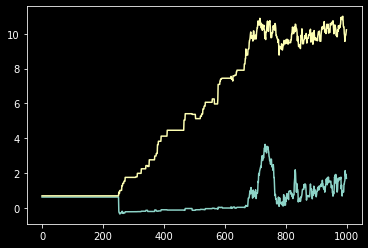

In [153]:

iteration_nr = 1000

alpha_initial = np.random.uniform()
beta_initial = np.random.uniform()

current_params = (alpha_initial, beta_initial)
alpha = []
beta = []

for i in range(iteration_nr): 
    alpha.append(current_params[0])
    beta.append(current_params[1])
    current_params = RWM_step(time, x, current_params)
    


plt.plot(alpha, label='alpha')
plt.plot(beta, label='beta')
current_params


## 1.9 
For a sample size of 100 from your Metropolis sampler compare
the sampling distribution to the exact posterior. How does the estimated poste-
rior compare with that obtained via independent sampling using the same sample
size?

In [142]:
import scipy 
exact_posterior = posterior(sampled_hist[1])[:-1]
sampled_hist
# kl_div = np.sum(np.product(exact_posterior, np.log(sampled_hist 




plt.figure()
fig = plt.hist(theta_dist, bins=theta)
independent_sample_hist = plt.hist(x, bins=theta)

plt.figure()

kl_div_MCMC = scipy.special.kl_div(sampled_hist[0], exact_posterior)
kl_div_independent_sampling = scipy.special.kl_div(independent_sample_hist[0], exact_posterior)

plt.plot(theta[:-1], kl_div_MCMC)
plt.plot(theta[:-1], kl_div_independent_sampling)


NameError: name 'sampled_hist' is not defined

## 1.10
Run 1000 iterations, where in each iteration you run a single
chain for 100 iterations. Store the results in a 1000 x 100 matrix. For each
iterate calculate the sample mean. Graph the resultant distribution of sample
means. How does MCMC do at estimating the posterior mean?

'MCMC sampled mean w./ 100 chains of length 1000: 0.052967982149767244 | Exact mean: 0.049019607843137254'

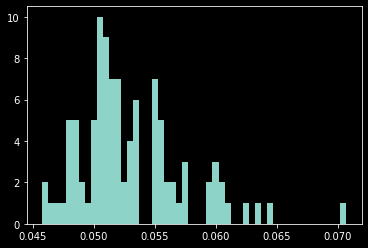

In [ ]:
chain_nr = 100
iteration_nr = 1000
MCMC_samples = np.random.uniform(size=(iteration_nr, chain_nr))

for i in range(1, iteration_nr):
    MCMC_samples[i, :] = RWM_step(MCMC_samples[i-1, :])

sampled_means = np.mean(MCMC_samples, axis=0)
fig = plt.hist(sampled_means, bins=50)


f'MCMC sampled mean w./ {chain_nr} chains of length {iteration_nr}: {np.mean(sampled_means)} | Exact mean: {exact_mean}'


## 1.11
Graph the distribution of the sample mean estimates of the for
the second 50 observations of each chain. How does this result compare with
that of the previous question? Why is there a difference?

'MCMC sampled mean w./ 100 halved chains of length 1000: 0.04927080923040798 | Exact mean: 0.049019607843137254'

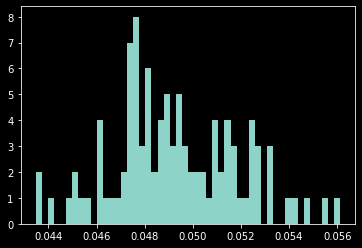

In [ ]:
sampled_means = np.mean(MCMC_samples[500:,:], axis=0)
fig = plt.hist(sampled_means, bins=50)


f'MCMC sampled mean w./ {chain_nr} halved chains of length {iteration_nr}: {np.mean(sampled_means)} | Exact mean: {exact_mean}'


## 1.12
Decrease the standard deviation (step size) of the proposal dis-
tribution to 0.01. For a sample size of 200, how the posterior for a step size of
0.01 compare to that obtained for 0.1?

## 1.13 
Increase the standard deviation (step size) of the proposal dis-
tribution to 1. For a sample size of 200, how the posterior for a step size of 1
compare to that obtained for 0.1

## 1.14 
Suppose we collect data for a number of such samples (each of
size 100), and find the following numbers of ticks that test positive for Borre-
lia: (3,2,8,25). Either calculate the new posterior exactly, or use sampling to
estimate it. (Hint: in both cases make sure you include the original sample of
6!)

## 1.15 
Generate samples from the posterior predictive distribution, and
use these to test your model. What do these suggest about your model’s assump-
tions?